In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### configuration ###

In [2]:
storage_path = r"/storage/users/assafzar/Muscle_Differentiation_AvinoamLab/"
data_csv_path = storage_path + r"data/mastodon/%s%s all detections.csv"
intensity_model_path = storage_path + r"15-12-2022-actin_intensity local dens-False, s%s, s%s train [130, 160] diff window win size 16/track len 30, impute_func-ImputeAllData_impute_zeroes reg MeanOpticalFlowReg_/"
motility_model_path = storage_path + r"15-12-2022-motility local dens-False, s%s, s%s train [130, 160] diff window/track len 30, impute_func-ImputeAllData_impute_zeroes reg MeanOpticalFlowReg_/"
FEATURES_DIR_PATH = f"data/mastodon/features/"


REG_METHOD = "MeanOpticalFlowReg_"
IMPUTE_FUNC = "impute_zeroes"
IMPUTE_METHOD = "ImputeAllData"
WIN_SIZE=16
diff_window=[130, 160] 
con_window=[[0, 30], [40, 70], [90, 120], [130, 160], [180, 210], [220, 250]]
transformed_data_path=storage_path + f"data/mastodon/ts_transformed/%s/{IMPUTE_METHOD}_{IMPUTE_FUNC}/S%s/merged_chunks_reg={REG_METHOD},local_den=False,win size={WIN_SIZE}.pkl"
SEGMENT_LEN = 30
today='01-08-2023'


### concat all differentiation score of all random forest models ###

In [38]:

def concatenated_dataframes(con_train, diff_train, con_test, diff_test, start_rf_number, final_rf_num, modality):


    print(f"\n train: con_n-{con_train},dif_n-{diff_train}; test: con_n-{con_test},dif_n-{diff_test}")  
    data_frames = []
    
    for i in range(start_rf_number, final_rf_num):
        dir_path = f"{storage_path}/confidence_interval/{today}-{modality} local dens-False, s{con_train}, s{diff_train} train" \
               + (f" win size {WIN_SIZE}" if modality != "motility" else "")

        second_dir = f"track len {SEGMENT_LEN}, impute_func-{IMPUTE_METHOD}_{IMPUTE_FUNC} reg {REG_METHOD}"

        save_dir_path = dir_path + "/" + second_dir + "/" + f"model_num-{i}, seed_num-{i}"
        
        # Read and append each data frame to the list
        df = pd.read_pickle(f'{save_dir_path}/df_score_vid_num_S3.pkl') 
        
        frames = []
        SpotID = []
        score = []
        clf_num = []
        for idx, row in df.iterrows():
            frames.extend([i * 5/60 for i in range(260)])
            SpotID.extend([row['Spot track ID'],] * 260)
            score.extend(row[list(range(260))].values.tolist())
            clf_num.extend([i,] * 260)

        dictoni = {"time":frames,"score_df":score,"Spot track ID":SpotID, "clf_num": clf_num}
        convert_df = pd.DataFrame(dictoni)
    
        data_frames.append(convert_df)

    # Concatenate all the data frames into a single DataFrame
    concatenated_df = pd.concat(data_frames)
    
    return concatenated_df





### plot all the score of each cell ###

In [3]:

def plot_single_cell_trajectories(scores_df, modality, diff_test, plot_mean=True, color="gray"):
    for track_id, diff_row in scores_df.groupby("Spot track ID"):
        for clf_num_id, track in diff_row.groupby("clf_num"):  
            plt.plot(track["time"], track['score_df'], linewidth=0.2, color=color)
           
        filename = f"/home/reutme/{modality}_predict interval of cell id: {int(track_id)}.eps"
        if plot_mean:
            plt.plot(diff_row.groupby("time")["score_df"].mean())
        plt.grid(False)
        plt.title(f"{modality} S{diff_test} - predict interval of cell id: {int(track_id)} ")
        plt.xlabel("time")
        plt.ylabel("score_df")
        
        
        # Set x-axis ticks from 6 to 14.5 with a jump of 0.5
        x_ticks = np.arange(6, 15)
        plt.xticks(x_ticks)

        # Save the plot as EPS format if a filename is provided
        plt.savefig(filename, format='eps')

        plt.show()

    print(f"Number of tracks in this analysis: 100")

In [ ]:
modality = 'actin_intensity'
concatenated_df = concatenated_dataframes(1,5,2,3, 1, 101, modality)

# Filter the rows where "time" is between 6 and 14
df_filtered = concatenated_df[(concatenated_df['time'] >= 6) & (concatenated_df['time'] <= 14)]

# Print the filtered data frame
df_filtered.head()

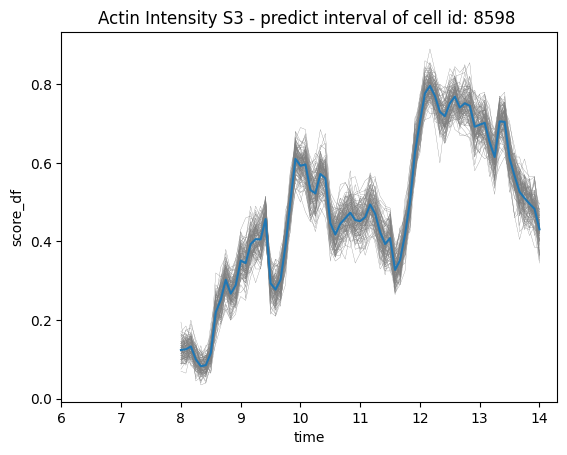

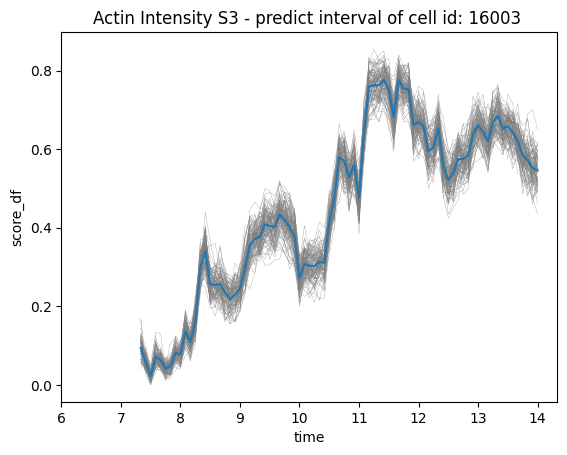

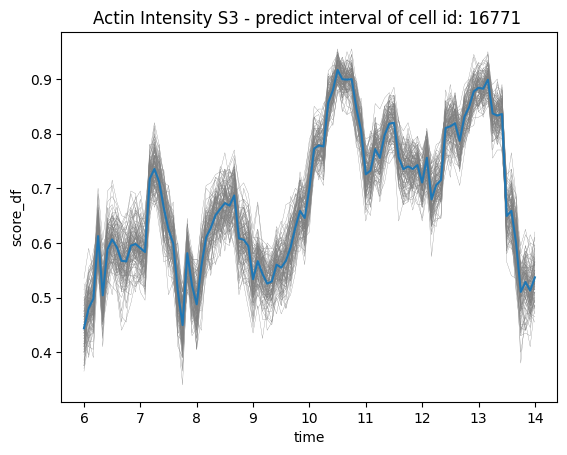

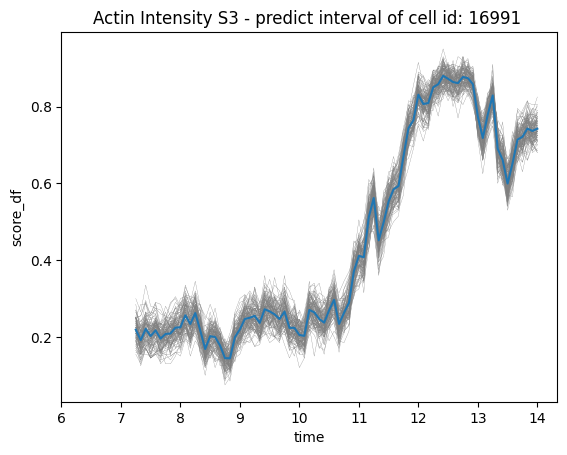

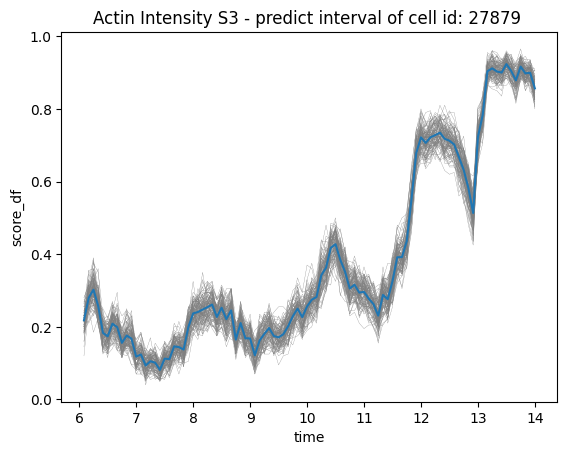

Number of tracks in this analysis: 100


In [48]:
plot_single_cell_trajectories(df_filtered, modality, '3')

In [49]:
modality = 'motility'
concatenated_df = concatenated_dataframes(1,5,2,3, 1,101, modality)
# Filter the rows where "time" is between 6 and 14.5
df_filtered = concatenated_df[(concatenated_df['time'] >= 6) & (concatenated_df['time'] <= 14)]

# Print the filtered data frame
df_filtered.head()


 train: con_n-1,dif_n-5; test: con_n-2,dif_n-3


,time,score_df,Spot track ID,clf_num
72,6.000000,NaN,8598.0,1
73,6.083333,NaN,8598.0,1
74,6.166667,NaN,8598.0,1
75,6.250000,NaN,8598.0,1
76,6.333333,NaN,8598.0,1


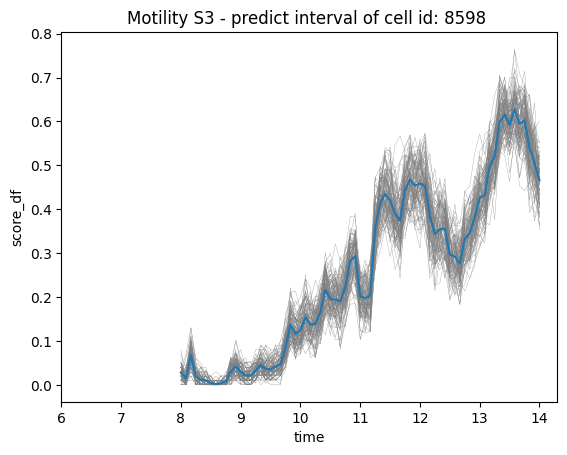

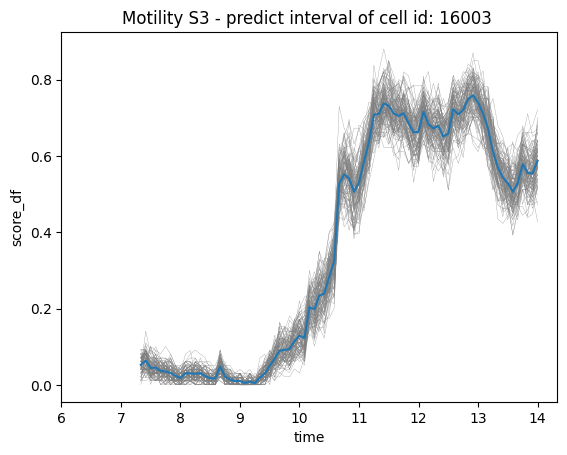

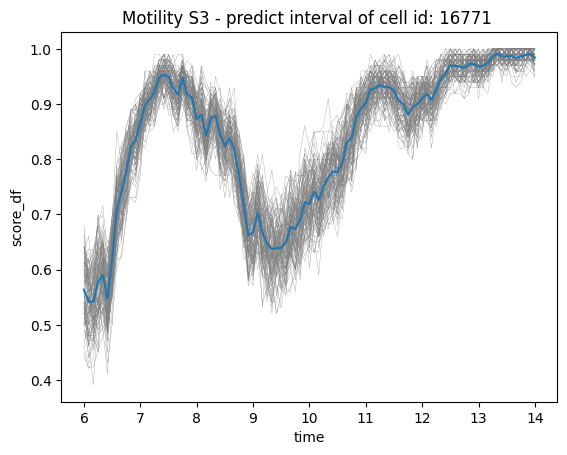

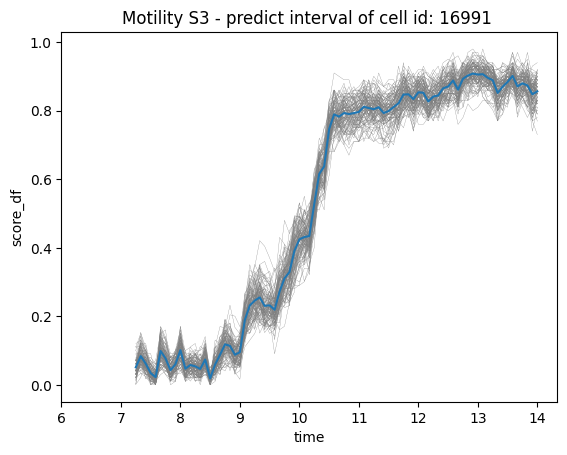

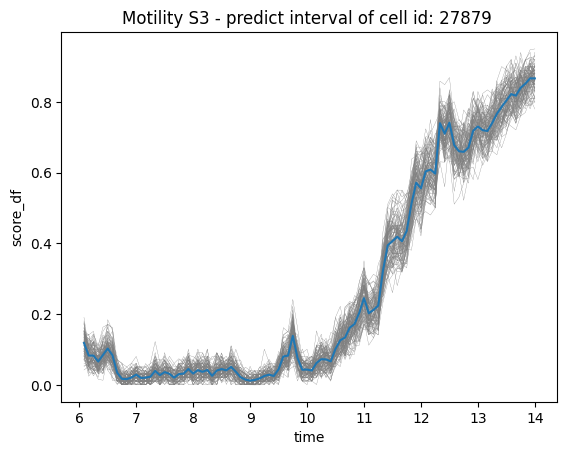

Number of tracks in this analysis: 100


In [50]:
plot_single_cell_trajectories(df_filtered, modality, '3')